### Problem-1

See Piazza

### Problem-2

Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (distribution
of income across countries and continents over time). Include a link to the original.
Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it
effectively visualize what is being asked? Why or why not?

GitHub Link: https://github.com/wzxqwe/DataVis-HW1/blob/master/5500HW1.ipynb
        
I chose to study the visualization in the aforementioned github link.The problem mentions about visualising the distribution of income across countries and continents over time. This problem could have been visualized in a couple different ways and my fellow classmate used a static visualization while I tried to generate a dynamic plot which is basically the main difference.

This particular visualization focuses on the relationship between GDP per capita and Year - It basically tries to see how the mean world GDP looks like for that particular year. While, it is pretty clear and easy to understand the static relationship between the two, it does fail to capture the the distribution of income across countries and continents.The visualization in some way lacks the interpretability of individual countries and continents but captures the overall mean world gdp statistic and overall world trend and possibility of economic cycles.  

One of the reasons I chose to work with dynamic plot for this particular problem is because the problem focussed on        *Visualizing the distribution of income (GDP / capita) across countries and continents, and how the distribution of income changes over time.* 
I wanted to mainly encapsulate the effect of time and how if affects the distribution over countries and continents which can lead to some interpretability in trends for the individual countries. While both of our visualizations establishes an increase in GDP with time, my interpretation focuses on certain specific trends like  
America, Australia and Europe have a higher GDP per capita since early years probably due to lower population and industrialization and that there is a gradual increase in south asian countries and middle-eastern regions after world-wars. More so, it is easy to visualize that there are still certain parts in africa that are a little below the average.



### Problem-3

Choose and critique one of the visualization by one of your fellow classmates for HW 1 Problem 2 (relationship
between income, life expectancy, and child mortality over time). Include a link to the original.
Describe the visualization and how it is similar and/or different from yours. Is it easy to interpret? Does it
effectively visualize what is being asked? Why or why not?

Git-Hub link: https://github.com/alefiya-naseem/DataVizHw1

I chose to study the visualization in the aforementioned link by my fellow classmate. Her visualization employs a dynamic graph that characterises the relationship between income, life expectancy and child mortality over time. I do like how she chose to create a single graph that almost captures 4 aspects and combines them all into one. It helps in visualizing different attributes over the entire time scale at the same time. However, interpretation over a particular year could be a little time-consuming or confusing. Only thing that could enhance interpretability and understanding could be color-coding and labeling the bubbles.My visualization was more towards static plots to understand the relationships and drive conclusion/intuitions
My idea was to break down the problem into multiple plots to characterise individual relationships of income with time, life expectancy with time and child mortality over time.  

### Problem - 4

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and
life expectancy over time. Justify your choice of model and comment on its appropriateness. (You are not
required to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)
Visualize the model(s) and comment on what they tell you about the relationship between income and life
expectancy over time.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing as pp
#from sklearn.preprocessing import PolynomialFeature
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df_life_expectancy = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
df_gdp = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv').rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_income'})
merged_df = pd.merge(df_gdp, df_life_expectancy, on = ['geo', 'time'])

merged_df.head()

,geo,time,gdp_income,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


#### Plot Correlation between the variables to determine how the relationship is

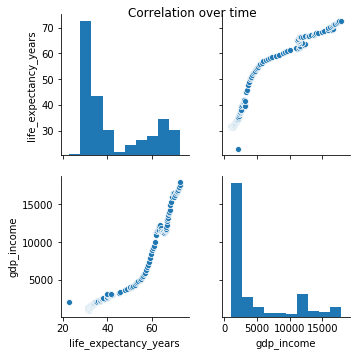

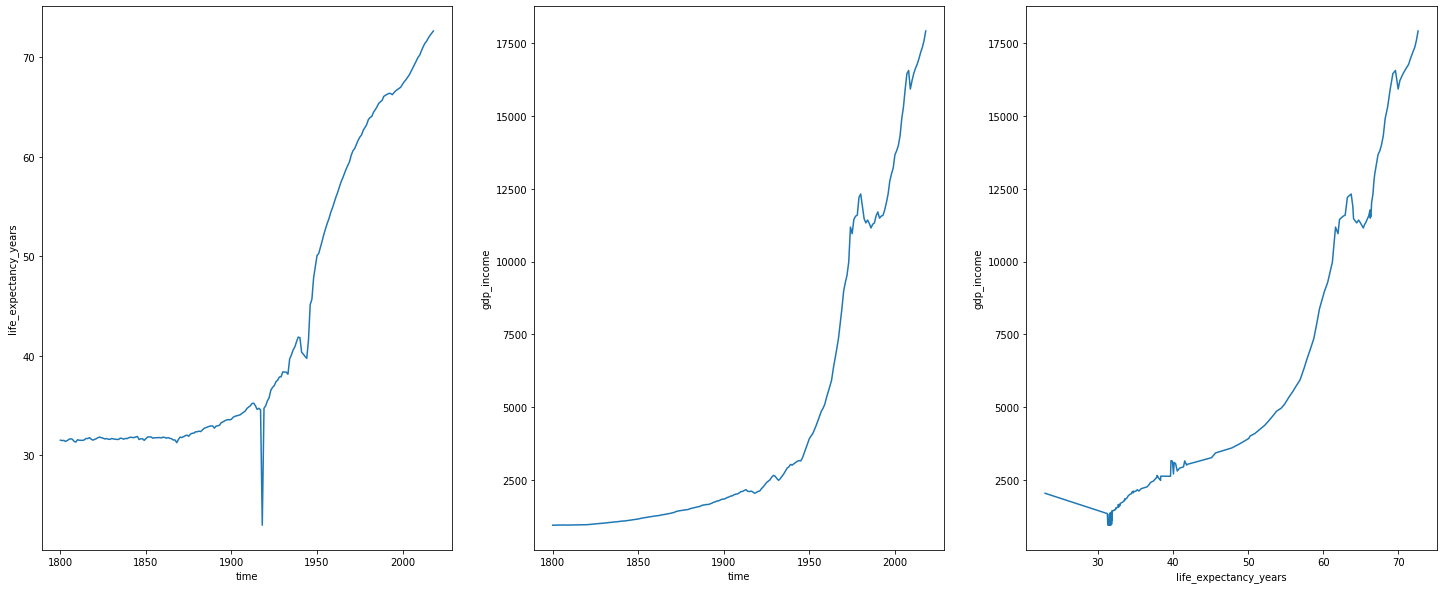

In [4]:
grouped_time_df = merged_df[['time','life_expectancy_years', 'gdp_income']].groupby(['time']).mean().reset_index()
sns.pairplot(grouped_time_df[['life_expectancy_years', 'gdp_income']])
plt.suptitle('Correlation over time')
fig, ax = plt.subplots(ncols=3,figsize=(25,10))
sns.lineplot(x="life_expectancy_years" ,y='gdp_income',data = grouped_time_df,ax = ax[2])
sns.lineplot(x="time", y='life_expectancy_years', data=grouped_time_df, ax=ax[0])
sns.lineplot(x="time", y='gdp_income', data=grouped_time_df, ax=ax[1])
plt.show()


The plots do indicate a positive somehwhat non-linear relationship between life_expectancy and gdp over time. First approach would be to see how well a linear regression model fits when we average gdp and life expectancy years over time.

#### Simple Linear Regression Analysis

In [5]:
df = merged_df[['life_expectancy_years','time']].groupby(['time']).mean().reset_index()
X = df['life_expectancy_years'].values.reshape(-1,1)
df1 = merged_df[['gdp_income','time']].groupby(['time']).mean().reset_index()
y = df1['gdp_income'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-9768.41406435]
[[336.37787472]]


#### A scatterplot of Relationship between mean GDP v/s mean Life expectancy over time

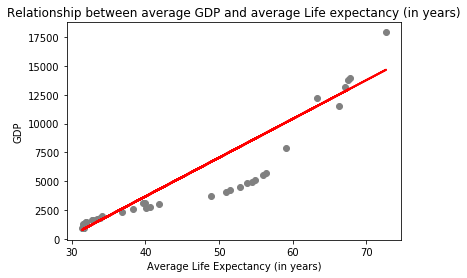

In [6]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Relationship between average GDP and average Life expectancy (in years)")
plt.ylabel("GDP")
plt.xlabel("Average Life Expectancy (in years)")
plt.show()

It easy to notice that the best fit line doesn't really define the true shape of the data and a little improvement in the model can maybe help fit the data better. 

#### Bar Plot to compare the actual and predicted GDP values for first 25 data points based on life expectancy years.

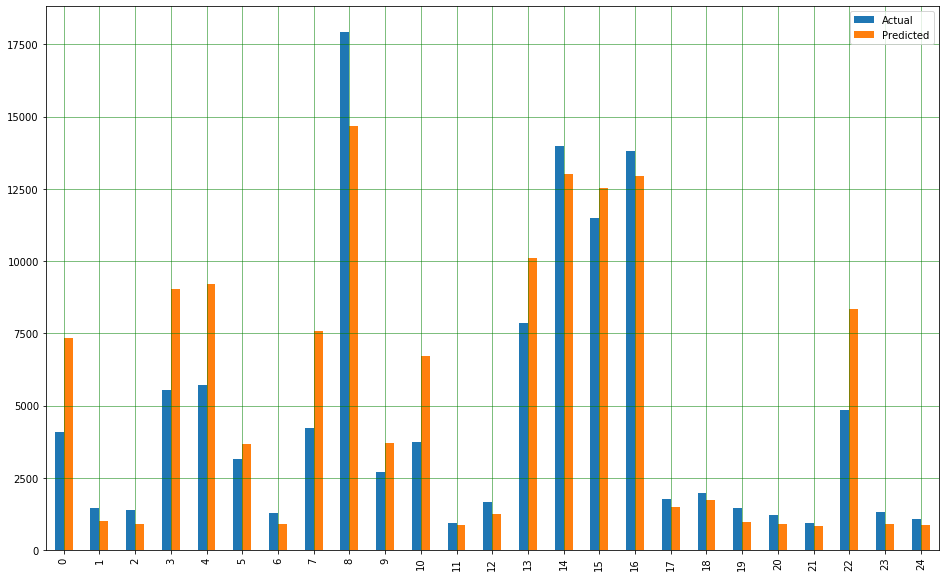

In [7]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [8]:
print('R-squared Coefficient:',metrics.r2_score(y_test, y_pred))

R-squared Coefficient: 0.8341854531691711


Since we do witness a little non-linearity in the visualizations and R_squared can use a little improvement,it might be better to see if doing a polynomial regression is fitting the data better.

#### Polynomial Regression Analysis

In [9]:
import numpy as np

poly = pp.PolynomialFeatures(2)
lin_regressor = LinearRegression()
X_transform = poly.fit_transform(X_train)

# fit this to Linear Regressor
lin_regressor.fit(X_transform,y_train) 

X_trans = poly.fit_transform(X_test)
# get the predictions
y_preds = lin_regressor.predict(X_trans)

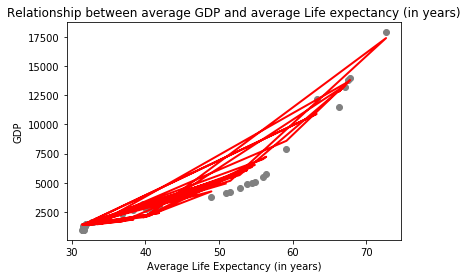

In [10]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_preds.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_preds, color='red', linewidth=2)
plt.title("Relationship between average GDP and average Life expectancy (in years)")
plt.ylabel("GDP")
plt.xlabel("Average Life Expectancy (in years)")
plt.show()

Our best fit line definitely fits the data better now and easy to see the increase in average life expectancy with increase in GDP and time

#### Residual Plot to check for auto-correlation

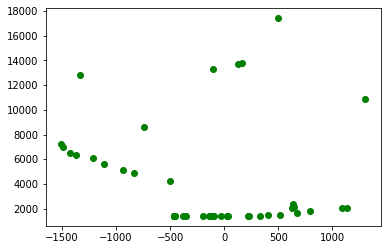

In [11]:
plt.scatter((y_test - y_preds), y_preds,color='g')

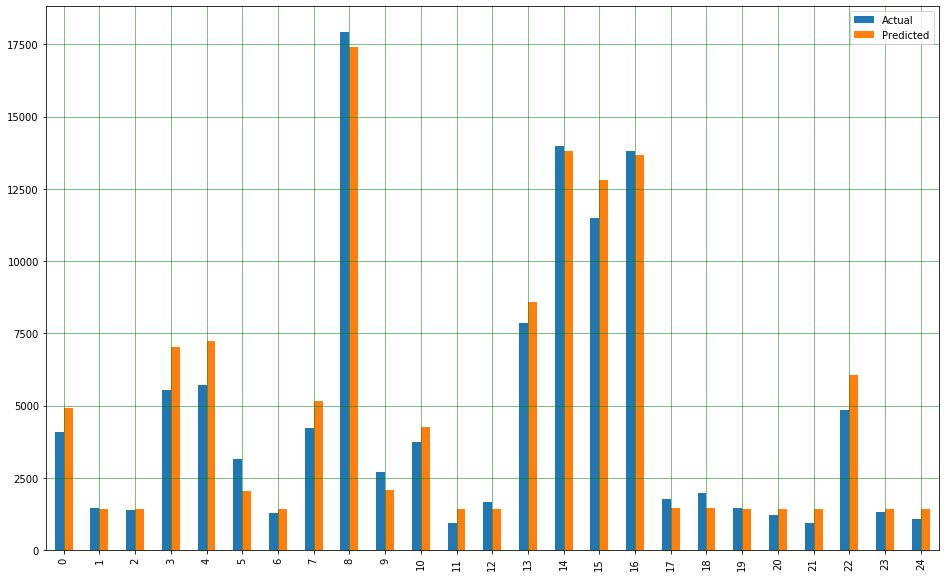

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
print('R-squared Coefficient:',metrics.r2_score(y_test, y_preds))

R-squared Coefficient: 0.9690301281427398


We do see a huge improvement in the R_squared coefficient after applying polynomial regression that captures the non-linearity of the data much better
than the linear regression.

Appropriatness of the model: I believe polynomial regression analysis is safe to use since we do see a curvilinear relationship between the 2 variables, that fits the data better than the simple linear regression analysis. More so, linear regression analysis requires that there is little or no autocorrelation in the data.Autocorrelation occurs when the residuals are not independent from each other. Residual plots show no patterns and we can say the models employed are appropriate.

### Problem-5

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child
mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required
to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)
Visualize the model(s) and comment on what they tell you about the relationship between income and child
mortality over time.


In [14]:
import pandas as pd

df_life_expectancy = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
df_child_mortality = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
df_country = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')[['country', 'world_4region']]
df_gdp = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv').rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_income'})
merged_df = pd.merge(df_child_mortality, df_gdp, on = ['geo', 'time']) 

merged_df.head()

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,gdp_income
0,afg,1800,468.58,603
1,afg,1801,468.58,603
2,afg,1802,468.58,603
3,afg,1803,468.58,603
4,afg,1804,468.58,603


#### Correlation Plots

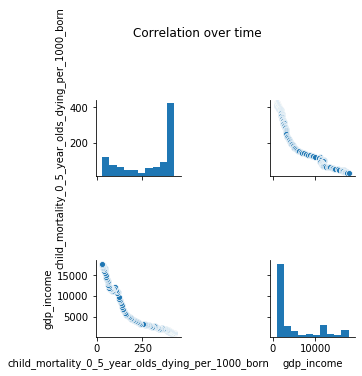

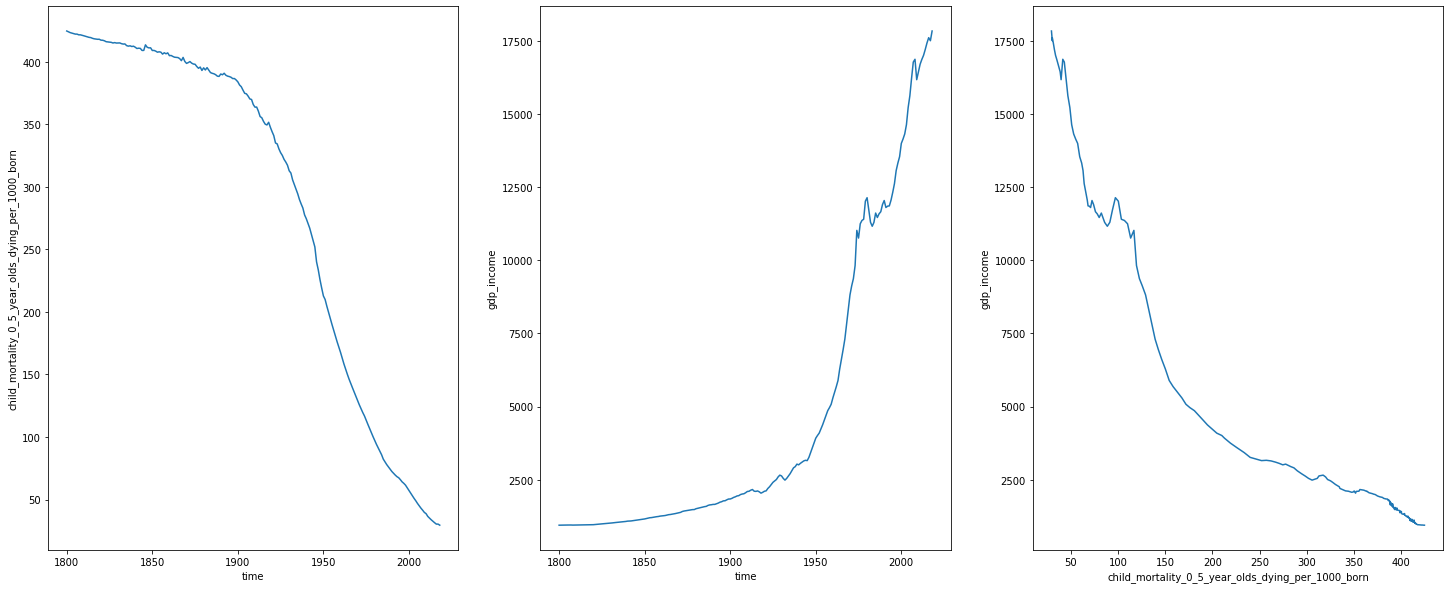

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
grouped_time_df = merged_df[['time','child_mortality_0_5_year_olds_dying_per_1000_born', 'gdp_income']].groupby(['time']).mean().reset_index()
sns.pairplot(grouped_time_df[['child_mortality_0_5_year_olds_dying_per_1000_born', 'gdp_income']])
plt.suptitle('Correlation over time')
fig, ax = plt.subplots(ncols=3,figsize=(25,10))
sns.lineplot(x="child_mortality_0_5_year_olds_dying_per_1000_born" ,y='gdp_income',data = grouped_time_df,ax = ax[2])
sns.lineplot(x="time", y='child_mortality_0_5_year_olds_dying_per_1000_born', data=grouped_time_df, ax=ax[0])
sns.lineplot(x="time", y='gdp_income', data=grouped_time_df, ax=ax[1])
plt.show()

#### Tests for autocorrelation - Residual plots should not exhibit Pattern

My approach is to use regression analysis based on the intuition from correlation plots that indicates an increase in mean GDP over time and decrease in mean child mortality over time. Since the problem does not focus on individual countries or continents, I've employed mean for calculating the average world child mortality statistic and average world gdp statistic. 

In [16]:
df = merged_df[['child_mortality_0_5_year_olds_dying_per_1000_born','time']].groupby(['time']).mean().reset_index()
X = df['child_mortality_0_5_year_olds_dying_per_1000_born'].values.reshape(-1,1)
df1 = merged_df[['gdp_income','time']].groupby(['time']).mean().reset_index()
y = df1['gdp_income'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[14909.02244995]
[[-34.92513733]]


#### A scatterplot of Relationship between mean GDP v/s mean Child Mortality over time

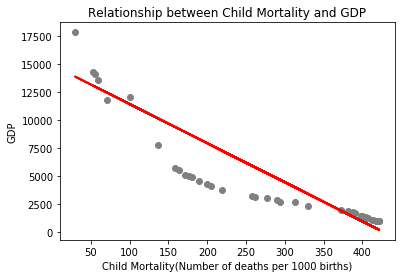

In [17]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Relationship between Child Mortality and GDP")
plt.ylabel("GDP")
plt.xlabel("Child Mortality(Number of deaths per 1000 births)")
plt.show()

#### Bar Plot to compare the actual and predicted GDP values for first 25 data points based on Child Mortality.

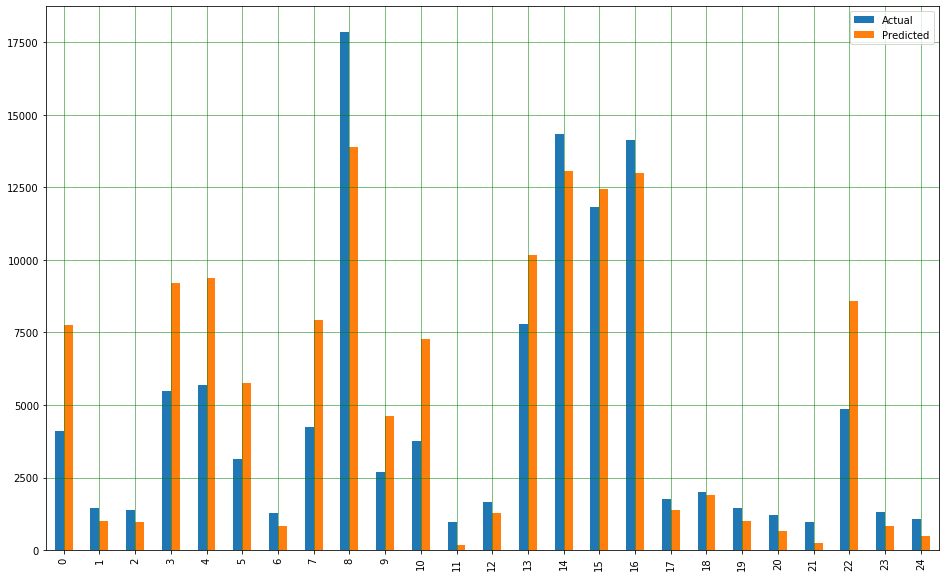

In [18]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
print('R-squared Coefficient:',metrics.r2_score(y_test, y_pred))

R-squared Coefficient: 0.7694980251094863


Bar-plot gives us some intuition on how our predictions are and R_squared coefficient indicates that there is still some room for improvement in the models. Next step would be to perform polynomial regression with degree=2 to see if it improves the predictions.

#### Polynomial Regression Analysis

In [20]:
poly = pp.PolynomialFeatures(2)
lin_regressor = LinearRegression()
X_transform = poly.fit_transform(X_train)
lin_regressor.fit(X_transform,y_train) 

X_trans = poly.fit_transform(X_test)
# get the predictions
y_preds = lin_regressor.predict(X_trans)

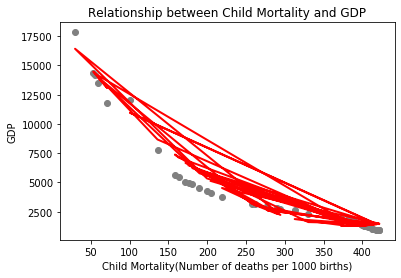

In [21]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_preds.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_preds, color='red', linewidth=2)
plt.title("Relationship between Child Mortality and GDP")
plt.ylabel("GDP")
plt.xlabel("Child Mortality(Number of deaths per 1000 births)")
plt.show()


#### Autocorrelation Test: Residual Plot

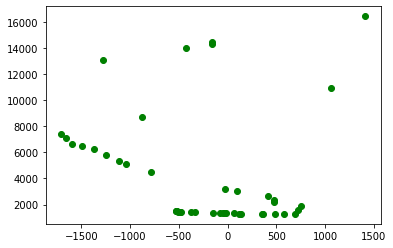

In [22]:
plt.scatter((y_test - y_preds), y_preds,color='g')

No pattern is observed

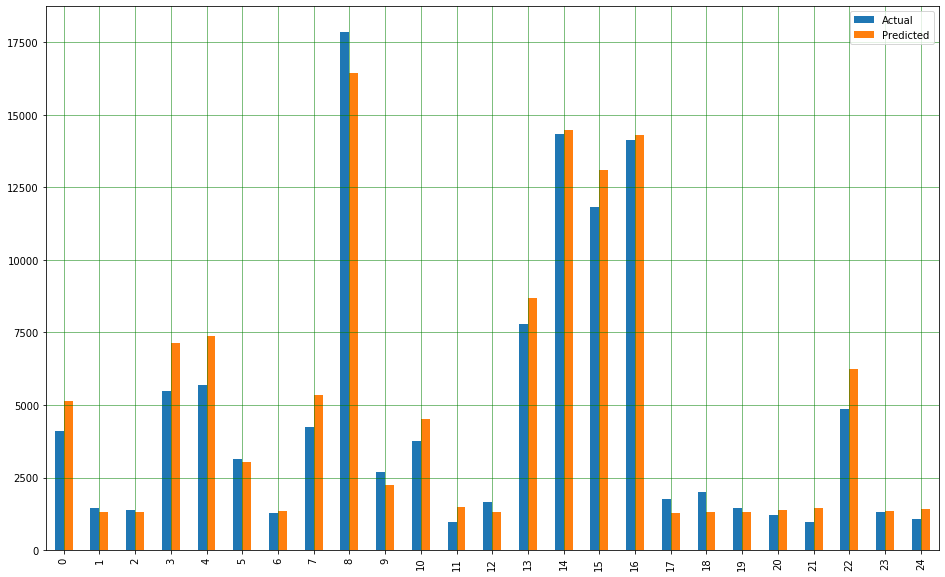

In [23]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [24]:

print('R-squared Coefficient:',metrics.r2_score(y_test, y_preds))

R-squared Coefficient: 0.9658905391469389


It is easy to see that Polynomial Regression greatly improves the predictions and R_squared coefficient. 

Appropriatness of the model: I believe polynomial regression analysis is safe to use since we do see a curvilinear relationship between the 2 variables, that fits the data better than the simple linear regression analysis. More so, linear regression analysis requires that there is little or no autocorrelation in the data.Autocorrelation occurs when the residuals are not independent from each other. Residual plots show no patterns and we can say the models employed are appropriate.  